#### Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.


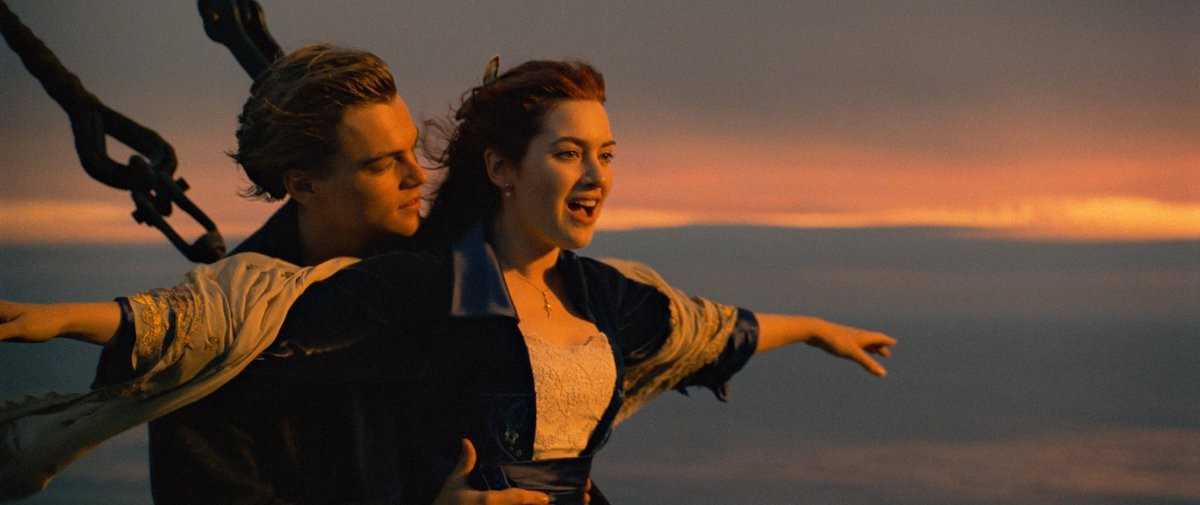

#### Set up the notebook environment by importing the required librarie.s

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

#### Let’s load the data and check how data looks like..

In [ ]:
data = pd.read_csv("titanic_train.csv")

In [ ]:
data.head()

* This is how our Data looks like.

### Variable Description
- PassengerId: unique id number to each passenger
- Survived: passenger survive(1) or died(0)
- Pclass: passenger class 1 = 1st,2 = 2nd, 3 = 3rd 
- Name: name
- Sex: gender of passenger
- Age: age of passenger
- SibSp: number of siblings/spouses
- Parch: number of parents/children
- Ticket: ticket number
- Fare: amount of money spent on ticket
- Cabin: cabin category
- Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

**Features**: The dataset has roughly the following types of features:

**Categorical/Nominal:** Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

**Binary:** A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)

**Ordinal:** They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)

**Continuous:** They can take up any value between the minimum and maximum values in a column. 
Eg. Age, Fare

**Count:** They represent the count of a variable. 
Eg. SibSp, Parch

**Useless:** They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.


####  Fetch some info about data by .info()

In [ ]:
print("Shape of data is :",data.shape)
print("*"*100)
data.info()

##### Observations:

1. Shape of data is (891,12) means in our data set we have 891 rows and 12 columns. Each row has info about a passenger so totally we have data of 891 passengers.
2. In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)
3. In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)
4. Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.
5. Except age and cabin any features does not have any null values.
6. float64(2): Fare, Age
7. int64(5): Pclass, sibsp, parch, passengerId and survived
8. object(5): Cabin, embarked, ticket, name and sex


We can see here that there are `int64`, `float64` and `object`. Well the first two simply means integers and floats respectively, while the object itself is essentially just a string. In the feature engineering chapter we are going to convert all these strings into numbers as basically any machine learning algorithms can only work with numerical data.

#### Fetch some info about numerical features by .describe()

In [ ]:
data.describe()

##### Observations:

1. Here some features are not necessary like passengerId. so we will ignore that. Only features which can be consider as numerical and need to analysis as numerical features are Age & Fare.

2. In Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. We have seen this above right.??. We have Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years. Std (standard deviation) as 14.52 It means most of the people have age in the range (29.69-2$*$14.52) to (29.69+2$*$14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-2*std) to (mean+2$*$std) <font color = 'red'> verify it </font>. The min age as 0.42 in above image so It means out of all passengers we have 0.4 years old as the minimum age of any passenger. And We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years. same we have 50%value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years. same as 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. Max value we can see as 80.00 years It means out of all passengers the highest aged person has age 80.00 Years.

3. Same like Age feature Analysis , you can analyze Fare feature.

In [ ]:
lwr_age = 29.69-2*14.52
print("lwr_age:", lwr_age)
upr_age = 29.69+2*14.52
print("upr_age:", upr_age)


In [ ]:
data[(data.Age>lwr_age) & (data.Age< upr_age)].shape[0]

We want to check if our data has missing values

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Observations

we see that Age and Cabin have lot of missing values and Embarked has two values. We will fix them later. 

#### Get infomation about balanced or imbalanced data set which may affect the preprocessing or algoirthm.

In [ ]:
print(data["Survived"].unique())

In [ ]:
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

##### Observations-

* We can see out of 891 passengers , 549 did not survive in that disaster and 342 Survived. So the data we have can not be said as imbalanced. neither it is perfectly balanced . it is like ok ok situation.

We can see the percentage also

In [ ]:
data["Survived"].value_counts()/data.shape[0]*100

## Uni-variate Analysis

### Numerical Variables

In [ ]:
num_var  = ["Fare", "Age" ]

for i in num_var:
    plt.hist(data[i], bins = 30)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()

### Categorical Variables

#### 1.Survived Feature

In [ ]:
# Countplot counts the each category of value and plot that.
sns.countplot(x=data["Survived"],data = data);


##### Observations:

* As we can see ‘no’ has the value > 500 means these people did not survive in the disaster & approx 350 people survived. It is telling same story like we have seen above.

#### 2. Pclass- Feature

In [ ]:
sns.countplot(x = "Pclass", data = data)
plt.show()

In [ ]:
# Group the dataset by Pclass and Survived
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d");

In [ ]:
sns.countplot(x = data["Pclass"],hue = data["Survived"],data = data);

In [ ]:
g = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

In [ ]:
pclass_count = data.groupby('Pclass')['Pclass'].count()
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2','Class 3'], autopct='%1.1f%%', textprops={'fontsize':13});


##### Observations-

* In above output plot we can see Persons who were traveling in 3rd class , mostly of them died or did not survive as compared to other class passengers.
* Persons who were traveling in 2nd class, out of them almost equal number of people died and survived.
* Persons who were traveling in 1st class, out of them large number of people survived and also fair number of persons died.
* So as the conclusion we can say that person who were traveling in lower class like 3rd class  has higher chances to die & persons who were traveling in higher class like 1st class has higher chance to survive.

#### 3.Sex- Feature

In [ ]:
sns.countplot(x =data["Sex"],hue = data["Survived"],data = data);

In [ ]:
pclass_count = data.groupby('Sex')['Sex'].count()
plt.title('Grouped by Sex')
plt.pie(pclass_count.values, labels=['Male', 'Female'], autopct='%1.1f%%', textprops={'fontsize':13});


##### Observations-

* As we can see in the above plot most of male died and out of all Female passengers most of them survived.
* So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive.Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

#### 4.Age-Feature- 

* Age feature consist some null values so first we need to handle that. Here i am filling the null values with median of Age Feature. we know that the median of Age feature is 28.
* Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

we will remove the missing values first and see the distribution

In [ ]:
ages = data[data['Age'].notnull()]['Age'].values
sns.histplot(ages,kde = True);

In [ ]:
g = sns.FacetGrid(data, col = "Survived")
g.map(sns.histplot, "Age", bins = 25, kde = True)
plt.show()

In [ ]:
# Filling null Values
data = data.fillna(28)   ### This is for analysis only. We are taking care of missing values later

# plotting Pdfs
sns.FacetGrid(data, hue="Survived", height=5) \
   .map(sns.histplot, "Age", kde = True) \
   .add_legend()
plt.show()

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True);

##### Observations-

* Pdfs are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.

* Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means rescuing priorities were given to child's or teenagers.
* Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.
* Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died. it could be because of various reasons like people leave them on their luck or they died because of cold water of Atlantic Ocean of that time.. etc..

Moreover, the survival rate is –  

- Good for children.
- High for women in the age range 20-50.
- Less for men as the age increases.

#### 5. Sibsp Feature

In [ ]:
sns.countplot(x = data["SibSp"],hue = data["Survived"],data = data);

In [ ]:
g = sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

##### Observations-


* Passengers who have 0 siblings mostly of them died.
* Passengers with 1 sibling has equally chance for both die and survive.
* Wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive. But it should be high right.. because if I were on the titanic and have 4 , 5 or 8 siblings on titanic then chances of my survival should be high right. But sadly in hard times people thinks only for themselves not for others.

#### 6.Parch Feature

In [ ]:
sns.countplot(x = data["Parch"],hue = data["Survived"],data = data);

In [ ]:
g = sns.catplot(x = "Parch", y = "Survived", kind = "bar", data = data)
g.set_ylabels("Survived Probability")
plt.show()

##### Observations-

* Like sibsp almost Same theory is applying here. Analyze it by yourself.

#### 7. Fare feature 

In [ ]:
sns.FacetGrid(data, hue="Survived", height=5) \
   .map(sns.histplot, "Fare", kde = True) \
   .add_legend();
plt.show();

In [ ]:
plt.title('Fare distribution')
plt.boxplot(data['Fare'])
plt.show()

In [ ]:
# # Divide Fare into 4 bins
# data['Fare_Range'] = pd.qcut(data['Fare'], 4)
 
# # Barplot - Shows approximate values based
# # on the height of bars.
# sns.barplot(x ='Fare_Range', y ='Survived',
# data = data);

##### Observations-

* Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

* Here we see that the distribution is skewed to the right (a.k.a. positive skew) due to the fact that the longer tail is located at the right part of the box, where most of the data points are spread more densely at the range of approximately 10 to 35 currency unit. Additionally, outliers in the samples are represented by the circles.

####  8. Embarked Feature

In [ ]:
sns.countplot(x = data["Embarked"],hue = data["Survived"],data = data);

In [ ]:
data.Embarked.unique()

In [ ]:
pclass_count = data.groupby('Embarked')['Embarked'].count()
plt.title('Grouped by Embarked')
plt.pie(pclass_count.values, labels=['other', 'Cherburg','Queenstown','Southampton'], autopct='%1.1f%%', textprops={'fontsize':13});
#plt.pie(pclass_count.values, labels=['Cherburg','Queenstown','Southampton'], autopct='%1.1f%%', textprops={'fontsize':13});

##### Observations-

* Passengers who started his journey from Southampton , most of them died.
* There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

##### Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

In [ ]:
## Thsi is to make sure that we have survived in original form

data["Survived"] = data["Survived"].map({"yes":1 , "no":0})
data["Survived"].value_counts()


In [ ]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [ ]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


The inference we can draw from this table is:

1. The average age of survivors is 28, so young people tend to survive more.
2.  People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
3. In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
4. And if you are a child, and have siblings, you have less of a chance of surviving

Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:

In [ ]:
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

1. Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
2. Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
3. Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.
 

##  Bi-variate Analysis-

In [ ]:
sns.catplot(x = "Sex", y = "Age", data = data, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

In [ ]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = data, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

In [ ]:
sns.catplot(x = "Parch", y = "Age", data = data, kind = "box")
sns.catplot(x = "SibSp", y = "Age", data = data, kind = "box")
plt.show()

In [ ]:
data["Sex"] = [1 if i == "male" else 0 for i in data["Sex"]]

In [ ]:
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

#### Feature Engineering

#### SibSp and Parch

These two columns represent the number of siblings/spouses and the number of parents/children abroad the Titanic respectively. The idea here is to create a new column called `FamilySize` in which the value is taken from the two columns. 

**Assumption** Larger family size may have greater opportunity to get survived as they can stay intact with each other better than those who travel alone


In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.tail()

In [ ]:
sns.countplot(x ="FamilySize", data  = data);

In [ ]:
g = sns.catplot(x = "FamilySize", y = "Survived", data = data, kind = "bar")
g.set_ylabels("Survival")
plt.show()

### Embarked

There are 2 missing values in `Embarked` column. Since it is not a significant number, we are just going to eliminate them:

In [ ]:
data.shape

In [ ]:
data = data.dropna(subset=['Embarked'])
data.shape

The argument `subset` indicates that the code will drop rows with `NAN` values in `Embarked` column only. 

Next, if we take the unique values of this column, we will find that there are 3 possible values, namely C, Q and S (which stands for Cherbourg, Queenstown and Southampton). 

Here convert this column values into something like one-hot representation since any machine learning algorithm will never work with non-numerical data. To do that, we can use get_dummies() function coming with Pandas module.

In [ ]:
data.Embarked.unique()

In [ ]:
embarked_one_hot = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, embarked_one_hot], axis=1)
data.head()

### Cabin
We found that the values of that column are a letter followed with several numbers (also explained in the previous post). What I wanna do now is to extract all those initial characters.

The values of Cabin column contains plenty of missing values. Thus, I decided to fill that out with U, which stands for “Unknown”. It can simply be achieved using fillna() method.

Next step is to convert the values into numbers using one-hot encoding. 

In [ ]:
data.Cabin[:10]

In [ ]:
data['Cabin'] = data['Cabin'].fillna('U')
data['Cabin'] = data["Cabin"].apply(lambda x:x[0])
cabins_count = data["Cabin"].value_counts()
cabins_count

In [ ]:
## We will plot bar charts 
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)

In [ ]:
fig, ax = plt.subplots(1,2)

sns.countplot(ax = ax[0], x = data.Cabin, hue = data.Pclass)
sns.countplot(ax=ax[1],x = data.Cabin, hue = data.Survived )
plt.show()

Despite the large number of missing data, we can see a trend. The higher the deck, the higher the class

In [ ]:
cabin_one_hot = pd.get_dummies(data['Cabin'], prefix='Cabin')
data = pd.concat([data, cabin_one_hot], axis=1)
data.columns

In [ ]:
data.head()

#### Name

At the first you might be thinking that we don’t even need to take into account the values of Name column as it only holds the name of a person. Theoretically, name will never affect the survival chance of a person. And yes, I do agree with that. However, if we pay closer attention to its contents, we are going to find something interesting: title.

In [ ]:
data['Name']

Those titles may be a good feature to consider whether this person is survived or not. Therefore, we are going to take these titles using get_title() function that we declare manually by ourselves.

In [ ]:
str1 = "Braund, Mr. Owen Harris"
(str1.split(",")[1].split(".")[0].strip())

In [ ]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [ ]:
data["Title"] = data["Name"].apply(get_title)

We will check the unique values stored in `Title` column

In [ ]:
data["Title"].unique()

In [ ]:
data.Title.value_counts()

In [ ]:
sns.countplot(x="Title", data = data)
plt.xticks(rotation = 60)
plt.show()

<font color = 'red'> Before we do one hot encoding Do some manipulation Here we can see the distribution of age by title 
</font>  



In [ ]:
data[data["Title"] == 'Capt']

note: Capt. Edward Gifford Crosby is not the captain of the Titanic, he is one of passenger

In [ ]:
title_one_hot = pd.get_dummies(data['Title'], prefix='Title')
data = pd.concat([data, title_one_hot], axis=1)

### Sex
We know that there are only two values in in Sex column, namely female and male, which we know that this is also a categorical data. Therefore, we can simply use pd.get_dummies() function again to convert the values of this column into one-hot format.

In [ ]:
sex_one_hot = pd.get_dummies(data['Sex'], prefix='Sex')
data = pd.concat([data, sex_one_hot], axis=1)

### Age

Age is the most tricky part. We found that 177 out of 889 passengers’ age are missing. Therefore, we need to fill this with a number. However, in this case we will not just directly fill those NaNs with the median or mean of all existing age numbers. Instead, group all passengers data by its Title first, and then compute the median and mean  of each title group before eventually use these values to fill the missing values. As we see that median and means are very similar so we can use either one. 

In [ ]:
age_median = data.groupby('Title')['Age'].median()
age_median

In [ ]:
age_mean = data.groupby('Title')['Age'].mean()
age_mean

we need to create a function fill_age() which accepts a single value as its parameter. This x parameter basically just represents every row in our data frame.

In [ ]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

Now it’s time to apply this fill_age() function. However though, we need to be careful since essentially what we need to do is to replace only the missing Age, not the entire values in Age column. Therefore, I define a lambda function inside of apply() method. What’s actually done by the lambda function itself is that we are going to apply the fill_age() function only when the corresponding age is missing. Otherwise, if the age value already exists, then we will just use its existing value. 

In [ ]:
data['Age'] = data.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

Now check for data again like types and missing values etc. to make sure we have good quality data.  

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

### Outlier Detection

In [ ]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,["Age","SibSp","Parch","Fare"])]

In [ ]:
# drop outliers

In [ ]:
data = data.drop(detect_outliers(data,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [ ]:
data.shape

In [ ]:
data.columns

####  Some Important things to know.

* The data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset. And in the cabin data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set.

In [ ]:
# You can drop those 4 features from data set with this code.
data = data.drop(["PassengerId", "Name" , "Sex","Ticket" , "Cabin"],axis = 1)
data.head()

* Now the question comes in mind is that do we need to perform uni-variate analysis on every individual feature of the data set. how can it possible to perform uni-variate analysis on all features individually if we have a large dimensional data set. Well i think ans is no , we don’t need to perform uni-variate analysis on individual feature in a large dimensional data set. That will be too costly and time taking. in that case you can perform bi-variate analysis or take a set of columns and train a model only on that set of features and see if that is giving good result then definitely those features are useful to predict class label else not.. like these you can try many hacks to analyze.

https://uttu-parashar.medium.com/exploratory-data-analysis-on-titanic-data-set-for-beginners-3ec8d1059c5b

https://becominghuman.ai/titanic-survival-dataset-part-1-2-exploratory-data-analysis-5b98f7917913

https://becominghuman.ai/titanic-survival-dataset-part-2-2-logistic-regression-7ebe9e30bf54

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook